# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [3]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import make_pipeline

%matplotlib inline

In [4]:
#load and inspect the data
df = pd.read_csv("reg_data.csv")
df

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [5]:
assert df.shape == (100,2)

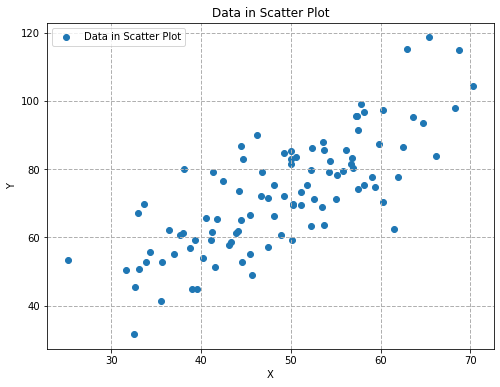

In [6]:
# plot the data (scatter)
plt.figure(figsize =(8, 6))
plt.scatter(df['X'], df['Y'], label = 'Data in Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data in Scatter Plot')
plt.legend(loc ='upper left')
plt.grid(True, linestyle ='--', linewidth = 1)
plt.show()

In [7]:
X = df['X']
Y = df['Y']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(80,)
(80,)
(20,)
(20,)


In [9]:
assert x_train.shape == (80,)
assert x_test.shape == (20,)
assert y_train.shape == (80,)
assert y_test.shape == (20,)

In [10]:
#implement a least squares function to find a, b
# Formula: b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2

xi = x_train
yi = y_train
x_mean = x_train.mean()
y_mean = y_train.mean()
b_upper = np.sum((xi - x_mean) * (yi - y_mean))
b_lower = np.sum((xi - x_mean) ** 2)
b = b_upper / b_lower

# Formula: a = y_mean - b * x_mean
a = y_mean - b * x_mean

print(b)
print(a)

1.3450919020620418
6.687439682550192


In [11]:
assert abs(a - 6.68) <=0.03
assert abs(b - 1.34) <=0.03

In [31]:
# y = a + bx + e
# default e is error term
e = 0
x = np.linspace(df.X.min(), df.Y.max(), 100)
line = a + (b * x) + e
line[:3]

array([40.48756089, 41.75741912, 43.02727735])

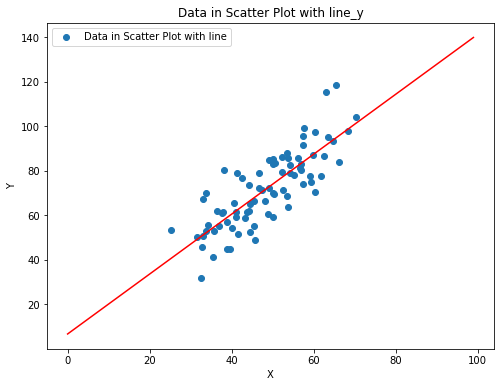

In [30]:
# plot for line_y
plt.figure(figsize =(8, 6))
plt.scatter(x_train, y_train, label = 'Data in Scatter Plot with line')
plt.plot(x, line, c = 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data in Scatter Plot with line_y')
plt.legend(loc ='upper left')
plt.show()

In [29]:
assert abs(a +3*b - 10.75) <= 0.09
assert abs(a +100*b - 140) <= 2

In [38]:
#Classify your test data in to classes
#if the Y value for a certain X is lower than the line then the class is 0

class_0 = []
class_1 = []

# we use range(x_test.shape[0]) because if we use any number like range(1, 100)
# then we can not use this code for other mechanics
# so only we use this
for i in range(x_test.shape[0]):
    
    if y_test.values[i] < (a + b * x_test.values[i]):
        class_0.append([x_test.values[i], y_test.values[i]])
        
    else:
        class_1.append([x_test.values[i], y_test.values[i]])


class_0 = np.array(class_0)
class_1 = np.array(class_1)
print(class_0.shape)
print(class_1.shape)

(11, 2)
(9, 2)


In [37]:
assert 9 < class_0.shape[0] < 13
assert 7 < class_1.shape[0] < 11

In [40]:
# First point is x it is 0
# Second point is y it 1
class_0[:3]

array([[51.0887199 , 69.58889785],
       [61.53035803, 62.5623823 ],
       [55.0780959 , 71.13972786]])

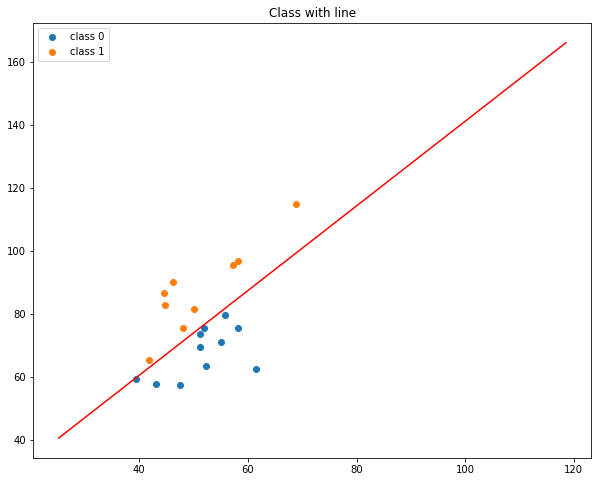

In [44]:
# plot the class as we did in ml3 for data
plt.figure(figsize = (10, 8))
plt.scatter(class_0[:, 0], class_0[:, 1], label = 'class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], label = 'class 1')
plt.plot(x, line, c = 'r')
plt.title('Class with line')
plt.legend()